In [1]:
from firedrake import *

/home/firedrake/firedrake/lib/python3.12/site-packages/pytools/__init__.py:2447: UserWarning: unable to find git revision
  warn("unable to find git revision", stacklevel=1)


In [4]:
mesh = UnitSquareMesh(32, 32)

BDM = FunctionSpace(mesh, "BDM", 1)
DG = FunctionSpace(mesh, "DG", 0)
W = BDM * DG

sigma, u = TrialFunctions(W)
tau, v = TestFunctions(W)

x, y = SpatialCoordinate(mesh)
f = Function(DG).interpolate(
    10*exp(-(pow(x - 0.5, 2) + pow(y - 0.5, 2)) / 0.02))

a = (dot(sigma, tau) + div(tau)*u + div(sigma)*v)*dx
L = - f*v*dx

bc0 = DirichletBC(W.sub(0), as_vector([0.0, -sin(5*x)]), 3)
bc1 = DirichletBC(W.sub(0), as_vector([0.0, sin(5*x)]), 4)

w = Function(W)

solve(a == L, w, bcs=[bc0, bc1])
sigma, u = w.subfunctions

VTKFile("poisson_mixed.pvd").write(u)

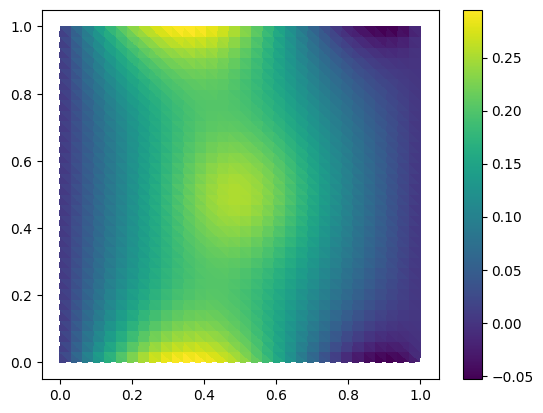

In [5]:
import matplotlib.pyplot as plt
from firedrake.pyplot import tripcolor
fig, axes = plt.subplots()
colors = tripcolor(u, axes=axes)
fig.colorbar(colors)
plt.show()